<p><font size="6"><b> CASE - Observation data - analysis</b></font></p>

> *DS Data manipulation, analysis and visualization in Python*  
> *May/June, 2021*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

## 1. Reading in the enriched observations data

<div class="alert alert-success">

**EXERCISE**
    
- Read in the `survey_data_completed.csv` file and save the resulting `DataFrame` as variable `survey_data_processed` (if you did not complete the previous notebook, a version of the csv file is available in the `data` folder).
- Interpret the 'eventDate' column directly as python `datetime` object and make sure the 'occurrenceID' column is used as the index of the resulting DataFrame (both can be done at once when reading the csv file using parameters of the `read_csv` function)
- Inspect the first five rows of the DataFrame and the data types of each of the data columns. Verify that the 'eventDate' indeed has a datetime data type.

<details><summary>Hints</summary>

- All read functions in Pandas start with `pd.read_...`.
- To check the documentation of a function, use the keystroke combination of SHIFT + TAB when the cursor is on the function.
- Remember `.head()` and `.info()`?
    
</details> 
    
</div>

In [2]:
survey_data_processed = pd.read_csv("data/survey_data_completed.csv", 
                                    parse_dates=['eventDate'], index_col="occurrenceID")

In [3]:
survey_data_processed.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938887,-109.081975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-16,31.938887,-109.081975,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938113,-109.082816,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
5,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


In [4]:
survey_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35550 entries, 1 to 35550
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   verbatimLocality  35550 non-null  int64         
 1   verbatimSex       33042 non-null  object        
 2   wgt               32283 non-null  float64       
 3   datasetName       35550 non-null  object        
 4   sex               33041 non-null  object        
 5   eventDate         35550 non-null  datetime64[ns]
 6   decimalLongitude  35550 non-null  float64       
 7   decimalLatitude   35550 non-null  float64       
 8   genus             33535 non-null  object        
 9   species           33535 non-null  object        
 10  taxa              33535 non-null  object        
 11  name              33535 non-null  object        
 12  class             33448 non-null  object        
 13  kingdom           33448 non-null  object        
 14  order             3344

## 2. Tackle missing values (NaN) and duplicate values

See [pandas_08_missing_values.ipynb](pandas_08_missing_values.ipynb) for an overview of functionality to work with missing values.

<div class="alert alert-success">

**EXERCISE**

How many records in the data set have no information about the `species`? Use the `isna()` method to find out.

<details><summary>Hints</summary>

- Do NOT use `survey_data_processed['species'] == np.nan`, but use the available method `isna()` to check if a value is NaN
- The result of an (element-wise) condition returns a set of True/False values, corresponding to 1/0 values. The amount of True values is equal to the sum.
    
</details>

In [6]:
survey_data_processed['species'].isna().sum()

2015

<div class="alert alert-success">

**EXERCISE**

How many duplicate records are present in the dataset? Use the method `duplicated()` to check if a row is a duplicate.

<details><summary>Hints</summary>

- The result of an (element-wise) condition returns a set of True/False values, corresponding to 1/0 values. The amount of True values is equal to the sum.
    
</details>

In [7]:
survey_data_processed.duplicated().sum()

1577

<div class="alert alert-success">

**EXERCISE**

- Select all duplicate data by filtering the `observations` data and assign the result to a new variable `duplicate_observations`. The `duplicated()` method provides an `keep` argument define which duplicates (if any) to mark.
- Sort the `duplicate_observations` data on both the columns `eventDate` and `verbatimLocality` and show the first 9 records.

<details><summary>Hints</summary>

- Check the documentation of the `duplicated` method to find out which value the argument `keep` requires to select all duplicate data.
- `sort_values()` can work with a single columns name as well as a list of names.
    
</details>

In [8]:
duplicate_observations = survey_data_processed[survey_data_processed.duplicated(keep=False)]
duplicate_observations.sort_values(["eventDate", "verbatimLocality"]).head(9)

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
5,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
14,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938113,-109.082816,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
13,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938113,-109.082816,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
34,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,31.938056,-109.079307,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
38,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,31.938056,-109.079307,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
40,11,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,31.938056,-109.079307,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
27,15,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,31.937059,-109.081036,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
28,15,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,31.937059,-109.081036,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


<div class="alert alert-success">

**EXERCISE**

- Exclude the duplicate values (i.e. keep the first occurrence while removing the other ones) from the `observations` data set and save the result as `survey_data_unique`. Use the `drop duplicates()` method from Pandas.
- How many observations are still left in the data set?    

<details><summary>Hints</summary>

- `keep=First` is the default option for `drop_duplicates`
- The number of rows in a DataFrame is equal to the `len`gth    
    
</details>

In [9]:
survey_data_unique = survey_data_processed.drop_duplicates()

In [10]:
len(survey_data_unique)

33973

<div class="alert alert-success">

**EXERCISE**

Use the `dropna()` method to find out:    

- For how many observations (rows) we have all the information available (i.e. no NaN values in any of the columns)? 
- For how many observations (rows) we do have the `species_ID` data available ? 

<details><summary>Hints</summary>

- `dropna` by default removes by default all rows for which _any_ of the columns contains a `NaN` value. 
- To specify which specific columns to check, use the `subset` argument
    
</details>

In [11]:
len(survey_data_unique.dropna()), len(survey_data_unique.dropna(subset=['species']))

(29777, 31961)

<div class="alert alert-success">

**EXERCISE**

Filter the  `survey_data_unique` data and select only those records that do not have a `species` while having information on the `sex`. Store the result as variable `not_identified`.

<details><summary>Hints</summary>

- To combine logical operators element-wise in Pandas, use the `&` operator.
- Pandas provides both a `isna()` and a `notna()` method to check the existence of `NaN` values.
    
</details>

In [12]:
mask = survey_data_unique['species'].isna() & survey_data_unique['sex'].notna()
not_identified = survey_data_unique[mask]

In [13]:
not_identified.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938887,-109.081975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,15,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-17,31.937059,-109.081036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,17,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-17,31.937117,-109.079415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2,M,NaN,Ecological Archives E090-118-D1.,male,1977-08-19,31.938887,-109.081975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__NOTE!__ 

The `DataFrame` we will use in the further analyses contains species information:

In [14]:
survey_data = survey_data_unique.dropna(subset=['species']).copy()
survey_data['name'] = survey_data['genus'] + ' ' + survey_data['species']

<div class="alert alert-info">

**INFO**
    
For biodiversity studies, absence values (knowing that something is not present) are useful as well to normalize the observations, but this is out of scope for these exercises.
</div>

## 3. Select subsets of the data

In [15]:
survey_data['taxa'].value_counts()
#survey_data.groupby('taxa').size()

Rodent                 30939
Rodent-not censused      595
Bird                     354
Rabbit                    59
Reptile                   14
Name: taxa, dtype: int64

<div class="alert alert-success">

**EXERCISE**

- Select the observations for which the `taxa` is equal to 'Rabbit', 'Bird' or 'Reptile'. Assign the result to a variable `non_rodent_species`. Use the `isin` method for the selection.

<details><summary>Hints</summary>

- You do not have to combine three different conditions, but use the `isin` operator with a list of names.
    
</details>  

In [16]:
non_rodent_species = survey_data[survey_data['taxa'].isin(['Rabbit', 'Bird', 'Reptile'])]

In [17]:
len(non_rodent_species)

427

<div class="alert alert-success">

**EXERCISE**

Select the observations for which the `name` starts with the characters 'r' (make sure it does not matter if a capital character is used in the 'taxa' name). Call the resulting variable `r_species`.

<details><summary>Hints</summary>

- Remember the `.str.` construction to provide all kind of string functionalities? You can combine multiple of these after each other.
- If the presence of capital letters should not matter, make everything lowercase first before comparing (`.lower()`)    
    
</details>  

In [18]:
r_species = survey_data[survey_data['name'].str.lower().str.startswith('r')]

In [19]:
len(r_species)

2580

In [20]:
r_species["name"].value_counts()

Reithrodontomys megalotis     2485
Reithrodontomys fulvescens      75
Rodent sp.                      10
Reithrodontomys montanus         8
Reithrodontomys sp.              2
Name: name, dtype: int64

<div class="alert alert-success">

**EXERCISE**

Select the observations that are not Birds. Call the resulting variable <code>non_bird_species</code>.

<details><summary>Hints</summary>

- Logical operators like `==`, `!=`, `>`,... can still be used.
    
</details>  

In [21]:
non_bird_species = survey_data[survey_data['taxa'] != 'Bird']

In [22]:
len(non_bird_species)

31607

<div class="alert alert-success">

**EXERCISE**

Select the __Bird__ (taxa is Bird) observations from 1985-01 till 1989-12 using the `eventDate` column. Call the resulting variable `birds_85_89`.

<details><summary>Hints</summary>

- No hints, you can do this! (with the help of some `<=` and `&`)

    
</details>  

In [23]:
birds_85_89 = survey_data[(survey_data["eventDate"] >= "1985-01-01")
                          & (survey_data["eventDate"] <= "1989-12-31 23:59")
                          & (survey_data['taxa'] == 'Bird')]
birds_85_89.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
9829,14,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-19,31.937054,-109.081827,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9862,10,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-20,31.938017,-109.080091,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9896,9,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-20,31.937859,-109.080903,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9942,12,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-02-16,31.938203,-109.078519,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
10467,22,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-06-15,31.936441,-109.078602,Campylorhynchus,brunneicapillus,Bird,Campylorhynchus brunneicapillus,Aves,Animalia,Passeriformes,Chordata,"Campylorhynchus brunneicapillus (Lafresnaye, 1...",ACCEPTED,5231474.0


In [24]:
# alternative solution
birds_85_89 = survey_data[(survey_data["eventDate"].dt.year >= 1985)
                          & (survey_data["eventDate"].dt.year <= 1989) 
                          & (survey_data['taxa'] == 'Bird')]
birds_85_89.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
9829,14,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-19,31.937054,-109.081827,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9862,10,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-20,31.938017,-109.080091,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9896,9,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-01-20,31.937859,-109.080903,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
9942,12,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-02-16,31.938203,-109.078519,Amphispiza,bilineata,Bird,Amphispiza bilineata,Aves,Animalia,Passeriformes,Chordata,"Amphispiza bilineata (Cassin, 1850)",ACCEPTED,2491757.0
10467,22,NaN,NaN,Ecological Archives E090-118-D1.,NaN,1985-06-15,31.936441,-109.078602,Campylorhynchus,brunneicapillus,Bird,Campylorhynchus brunneicapillus,Aves,Animalia,Passeriformes,Chordata,"Campylorhynchus brunneicapillus (Lafresnaye, 1...",ACCEPTED,5231474.0


<div class="alert alert-success">

**EXERCISE**

- Drop the observations for which no 'weight' (`wgt` column) information is available.
- On the filtered data, compare the median weight for each of the species (use the `name` column)
- Sort the output from high to low median weight (i.e. descending)
    
__Note__ You can do this all in a single line statement, but don't have to do it as such!

<details><summary>Hints</summary>    

- You will need `dropna`, `groupby`, `median` and `sort_values`.
    
</details>  

In [25]:
# Multiple lines
obs_with_weight = survey_data.dropna(subset=["wgt"])
median_weight = obs_with_weight.groupby(['name'])["wgt"].median()
median_weight.sort_values(ascending=False)

name
Dipodomys spectabilis         124.0
Spermophilus spilosoma         93.5
Sigmodon hispidus              72.0
Sigmodon fulviventer           50.0
Dipodomys ordii                50.0
Sigmodon ochrognathus          49.0
Dipodomys merriami             44.0
Onychomys leucogaster          32.0
Perognathus hispidus           32.0
Chaetodipus baileyi            31.0
Onychomys torridus             24.0
Peromyscus eremicus            22.0
Peromyscus maniculatus         22.0
Onychomys sp.                  21.0
Peromyscus leucopus            20.0
Chaetodipus intermedius        19.5
Chaetodipus sp.                19.0
Chaetodipus penicillatus       17.0
Reithrodontomys sp.            15.5
Reithrodontomys fulvescens     13.0
Reithrodontomys montanus       10.5
Reithrodontomys megalotis      10.0
Perognathus flavus              8.0
Baiomys taylori                 8.0
Name: wgt, dtype: float64

In [26]:
# Single line statement
(survey_data
     .dropna(subset=["wgt"])
     .groupby(['name'])["wgt"]
     .median()
     .sort_values(ascending=False)
)

name
Dipodomys spectabilis         124.0
Spermophilus spilosoma         93.5
Sigmodon hispidus              72.0
Sigmodon fulviventer           50.0
Dipodomys ordii                50.0
Sigmodon ochrognathus          49.0
Dipodomys merriami             44.0
Onychomys leucogaster          32.0
Perognathus hispidus           32.0
Chaetodipus baileyi            31.0
Onychomys torridus             24.0
Peromyscus eremicus            22.0
Peromyscus maniculatus         22.0
Onychomys sp.                  21.0
Peromyscus leucopus            20.0
Chaetodipus intermedius        19.5
Chaetodipus sp.                19.0
Chaetodipus penicillatus       17.0
Reithrodontomys sp.            15.5
Reithrodontomys fulvescens     13.0
Reithrodontomys montanus       10.5
Reithrodontomys megalotis      10.0
Perognathus flavus              8.0
Baiomys taylori                 8.0
Name: wgt, dtype: float64

## 4. Species abundance

<div class="alert alert-success">

**EXERCISE**

Which 8 species (use the `name` column to identify the different species) have been observed most over the entire data set?

<details><summary>Hints</summary>

- Pandas provide a function to combine sorting and showing the first n records, see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nlargest.html)...
    
</details>

In [32]:
survey_data.groupby("name").size().nlargest(8)

name
Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
dtype: int64

In [33]:
survey_data['name'].value_counts()[:8]

Dipodomys merriami           10025
Dipodomys ordii               2966
Chaetodipus penicillatus      2928
Chaetodipus baileyi           2696
Reithrodontomys megalotis     2485
Dipodomys spectabilis         2481
Onychomys torridus            2220
Perognathus flavus            1475
Name: name, dtype: int64

<div class="alert alert-success">

**EXERCISE**

- What is the number of different species in each of the `verbatimLocality` plots? Use the `nunique` method. Assign the output to a new variable `n_species_per_plot`.
- Define a Matplotlib `Figure` (`fig`) and `Axes` (`ax`) to prepare a plot. Make an horizontal bar chart using Pandas `plot` function linked to the just created Matplotlib `ax`. Each bar represents the `species per plot/verbatimLocality`. Change the y-label to 'Plot number'.

<details><summary>Hints</summary>

- _...in each of the..._ should provide a hint to use `groupby` for this exercise. The `nunique` is the aggregation function for each of the groups.
- `fig, ax = plt.subplots()` prepares a Matplotlib Figure and Axes.
    
</details>

Text(0, 0.5, 'plot number')

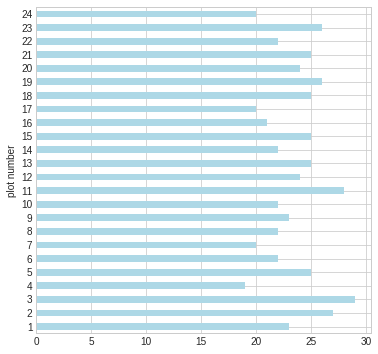

In [34]:
n_species_per_plot = survey_data.groupby(["verbatimLocality"])["name"].nunique()

fig, ax = plt.subplots(figsize=(6, 6))
n_species_per_plot.plot(kind="barh", ax=ax, color="lightblue")
ax.set_ylabel("plot number")

# Alternative option:
# inspired on the pivot table we already had:
# species_per_plot = survey_data.reset_index().pivot_table(
#     index="name", columns="verbatimLocality", values="occurrenceID", aggfunc='count')
# n_species_per_plot = species_per_plot.count()

<div class="alert alert-success">

**EXERCISE**

- What is the number of plots (`verbatimLocality`) each of the species have been observed in? Assign the output to a new variable `n_plots_per_species`. Sort the counts from low to high.
- Make an horizontal bar chart using Pandas `plot` function to show the number of plots each of the species was found (using the `n_plots_per_species` variable).  

<details><summary>Hints</summary>

- Use the previous exercise to solve this one.
    
</details>

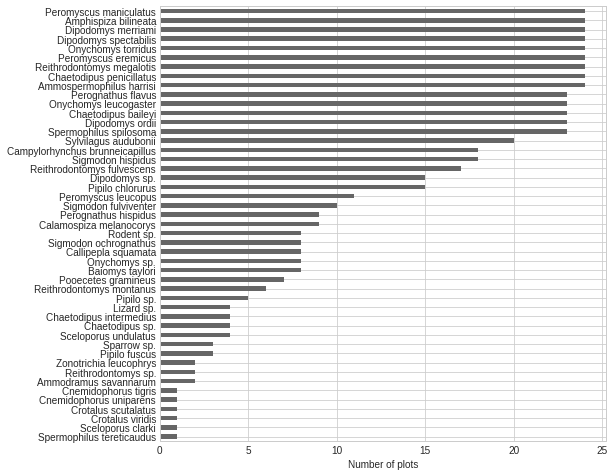

In [35]:
n_plots_per_species = survey_data.groupby(["name"])["verbatimLocality"].nunique().sort_values()

fig, ax = plt.subplots(figsize=(8, 8))
n_plots_per_species.plot(kind="barh", ax=ax, color='0.4')
ax.set_xlabel("Number of plots");
ax.set_ylabel("");

<div class="alert alert-success">

**EXERCISE**

- Starting from the `survey_data`, calculate the amount of males and females present in each of the plots (`verbatimLocality`). The result should return the counts for each of the combinations of `sex` and `verbatimLocality`. Assign to a new variable `n_plot_sex`.
- Use a `pivot_table` to convert the `n_plot_sex` DataFrame to a new DataFrame with the `verbatimLocality` as index and `male`/`female` as column names. Assign to a new variable `pivoted`.

<details><summary>Hints</summary>

- _...for each of the combinations..._ `groupby` can also be used with multiple columns at the same time.
- `reset_index()` is useful function to convert multiple indices into columns again.
    
</details>

In [58]:
n_plot_sex = survey_data.groupby(["sex", "verbatimLocality"]).size().rename("count").reset_index()
n_plot_sex.head()

,sex,verbatimLocality,count
0,female,1,792
1,female,2,838
2,female,3,810
3,female,4,825
4,female,5,495


In [59]:
pivoted = n_plot_sex.pivot_table(columns="sex", index="verbatimLocality", values="count")
pivoted.head()

sex,female,male
verbatimLocality,,
1,792,1027
2,838,1018
3,810,742
4,825,972
5,495,553


As such, we can use the variable `pivoted` to plot the result:

<AxesSubplot:xlabel='verbatimLocality'>

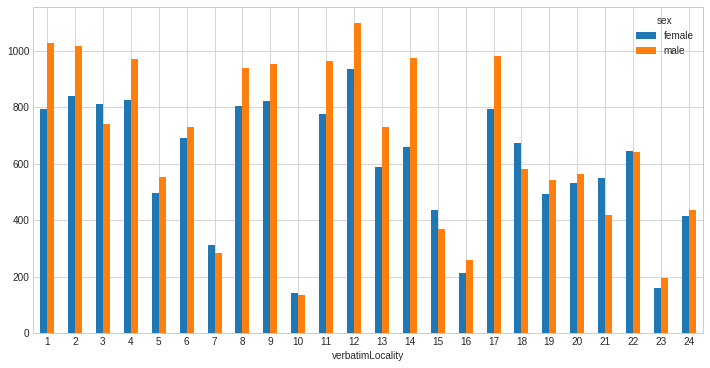

In [60]:
pivoted.plot(kind='bar', figsize=(12, 6), rot=0)

<div class="alert alert-success">

**EXERCISE**

Recreate the previous plot with the `catplot` function from the Seaborn library directly starting from `survey_data`. 

<details><summary>Hints</summary>

- Check the `kind`argument of the `catplot` function to find out how to use counts to define the bars instead of a `y` value.
- To link a column to different colors, use the `hue` argument

    
</details>

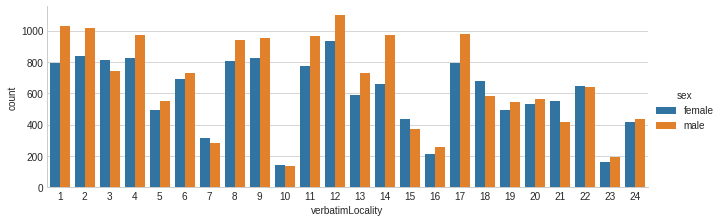

In [36]:
sns.catplot(data=survey_data, x="verbatimLocality", 
            hue="sex", kind="count", height=3, aspect=3)

<div class="alert alert-success">

**EXERCISE**

- Make a summary table with the number of records of each of the species in each of the plots (also called `verbatimLocality`). Each of the species `name`s is a row index and each of the `verbatimLocality` plots is a column name.
- Using the Seaborn <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a> to make a heatmap.

<details><summary>Hints</summary>

- Make sure to pass the correct columns to respectively the `index`, `columns`, `values` and `aggfunc` parameters of the `pivot_table` function. You can use the `occurrenceID` to count the number of observations for each name/locality combination.
    
</details>  

In [40]:
species_per_plot = survey_data.reset_index().pivot_table(index="name", 
                                                         columns="verbatimLocality", 
                                                         values="occurrenceID", 
                                                         aggfunc='count')

# alternative ways to calculate this
#species_per_plot = survey_data.groupby(['name', 'plot_id']).size().unstack(level=-1)
#species_per_plot = pd.crosstab(survey_data['name'], survey_data['plot_id'])

<AxesSubplot:xlabel='verbatimLocality', ylabel='name'>

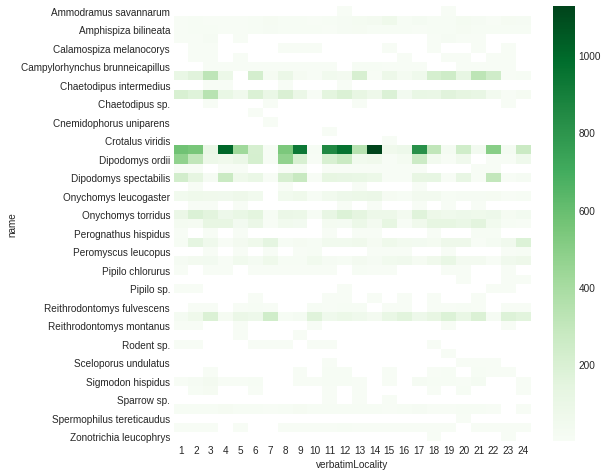

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(species_per_plot, ax=ax, cmap='Greens')

## 5. Observations over time

<div class="alert alert-success">

**EXERCISE**

Make a plot visualizing the evolution of the number of observations for each of the individual __years__ (i.e. annual counts) using the `resample` method.

<details><summary>Hints</summary>

- You want to `resample` the data using the `eventDate` column to create annual counts. If the index is not a datetime-index, you can use the `on=` keyword to specify which datetime column to use.
- `resample` needs an aggregation function on how to combine the values within a single 'group' (in this case data within a year). In this example, we want to know the `size` of each group, i.e. the number of records within each year.
    
</details>

<AxesSubplot:xlabel='eventDate'>

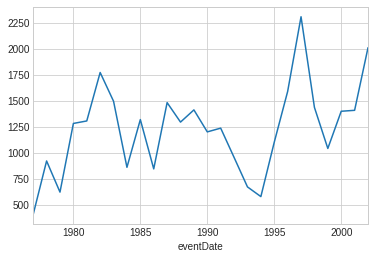

In [28]:
survey_data.resample('A', on='eventDate').size().plot()

To evaluate the intensity or number of occurrences during different time spans, a heatmap is an interesting representation. We can actually use the plotnine library as well to make heatmaps, as it provides the [`geom_tile`](http://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html) geometry. Loading the library:

In [30]:
survey_data.head()

,verbatimLocality,verbatimSex,wgt,datasetName,sex,eventDate,decimalLongitude,decimalLatitude,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
3,2,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-16,31.938887,-109.081975,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,7,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938113,-109.082816,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
5,3,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938896,-109.081208,Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
6,1,M,NaN,Ecological Archives E090-118-D1.,male,1977-07-16,31.938851,-109.082829,Perognathus,flavus,Rodent,Perognathus flavus,Mammalia,Animalia,Rodentia,Chordata,"Perognathus flavus Baird, 1855",ACCEPTED,2439566.0
7,2,F,NaN,Ecological Archives E090-118-D1.,female,1977-07-16,31.938887,-109.081975,Peromyscus,eremicus,Rodent,Peromyscus eremicus,Mammalia,Animalia,Rodentia,Chordata,"Peromyscus eremicus (Baird, 1857)",ACCEPTED,2437981.0


<div class="alert alert-success">

**EXERCISE**

- Create a table, called `heatmap_prep`, based on the `survey_data` DataFrame with the row index the individual years, in the column the months of the year (1-> 12) and as values of the table, the counts for each of these year/month combinations.
- Using the seaborn <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">documentation</a> make a heatmap starting from the `heatmap_prep` variable.    

<details><summary>Hints</summary>

- The `.dt` accessor can be used to get the `year`, `month`,... from a `datetime` column
- Use `pivot_table` and provide the years to `index` and the months to `columns`. Do not forget to `count` the number for each combination (`aggfunc`).
- `resample` needs an aggregation function on how to combine the values within a single 'group' (in this case data within a year). In this example, we want to know the `size` of each group, i.e. the number of records within each year.
    
</details>  

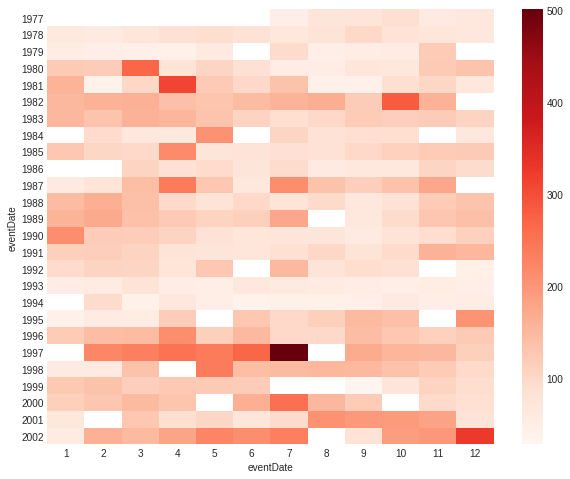

In [33]:
heatmap_prep = survey_data.pivot_table(index=survey_data['eventDate'].dt.year, 
                                       columns=survey_data['eventDate'].dt.month, 
                                       values='species', aggfunc='count')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap_prep, cmap='Reds')

Remark that we started from a `tidy` data format (also called *long* format) and converted to *short* format with in the row index the years, in the column the months and the counts for each of these year/month combinations as values.

## (OPTIONAL SECTION) 6. Evolution of species during monitoring period

*In this section, all plots can be made with the embedded Pandas plot function, unless specificly asked*

<div class="alert alert-success">

**EXERCISE**

Plot using Pandas `plot` function the number of records for `Dipodomys merriami` for each month of the year (January (1) -> December (12)), aggregated over all years.

<details><summary>Hints</summary>

- _...for each month of..._ requires `groupby`. 
- `resample` is not useful here, as we do not want to change the time-interval, but look at month of the year (over all years)
    
</details>

In [60]:
merriami = survey_data[survey_data["name"] == "Dipodomys merriami"]

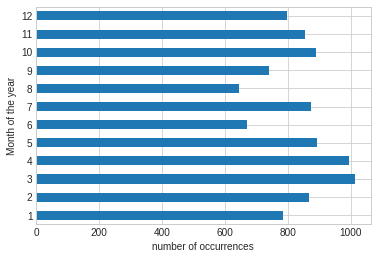

In [61]:
fig, ax = plt.subplots()
merriami.groupby(merriami['eventDate'].dt.month).size().plot(kind="barh", ax=ax)
ax.set_xlabel("number of occurrences");
ax.set_ylabel("Month of the year");

<div class="alert alert-success">

**EXERCISE**

Plot, for the species 'Dipodomys merriami', 'Dipodomys ordii', 'Reithrodontomys megalotis' and 'Chaetodipus baileyi', the monthly number of records as a function of time during the monitoring period. Plot each of the individual species in a separate subplot and provide them all with the same y-axis scale

<details><summary>Hints</summary>

- `isin` is useful to select from within a list of elements.
- `groupby` AND `resample` need to be combined. We do want to change the time-interval to represent data as a function of time (`resample`) and we want to do this _for each name/species_ (`groupby`). The order matters!
- `unstack` is a Pandas function a bit similar to `pivot` we did not mentioned during this course. Check the [unstack documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) as it might be helpful for this exercise.
    
</details>

In [62]:
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]

In [63]:
month_evolution = subsetspecies.groupby("name").resample('M', on='eventDate').size()

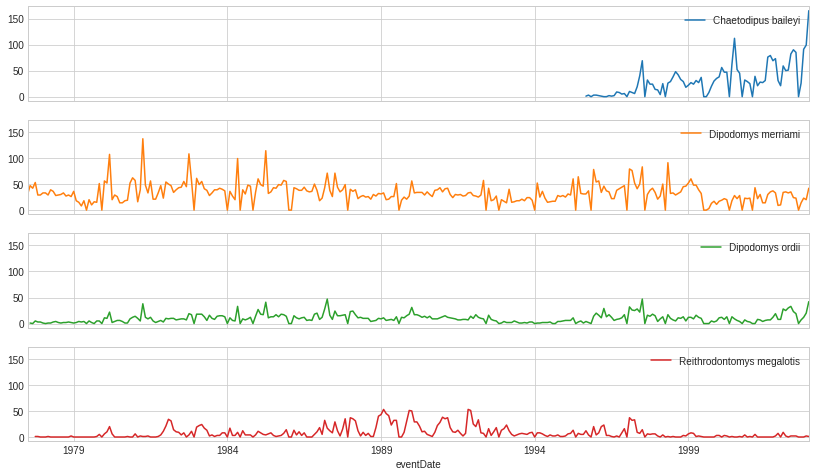

In [64]:
species_evolution = month_evolution.unstack(level=0)
axs = species_evolution.plot(subplots=True, figsize=(14, 8), sharey=True)

<div class="alert alert-success">

**EXERCISE**

Recreate the same plot as in the previous exercise using Seaborn `relplot` functon with the `month_evolution` variable.

In [65]:
# Given as solution..
subsetspecies = survey_data[survey_data["name"].isin(['Dipodomys merriami', 'Dipodomys ordii',
                                                      'Reithrodontomys megalotis', 'Chaetodipus baileyi'])]
month_evolution = subsetspecies.groupby("name").resample('M', on='eventDate').size().rename("counts")
month_evolution = month_evolution.reset_index()

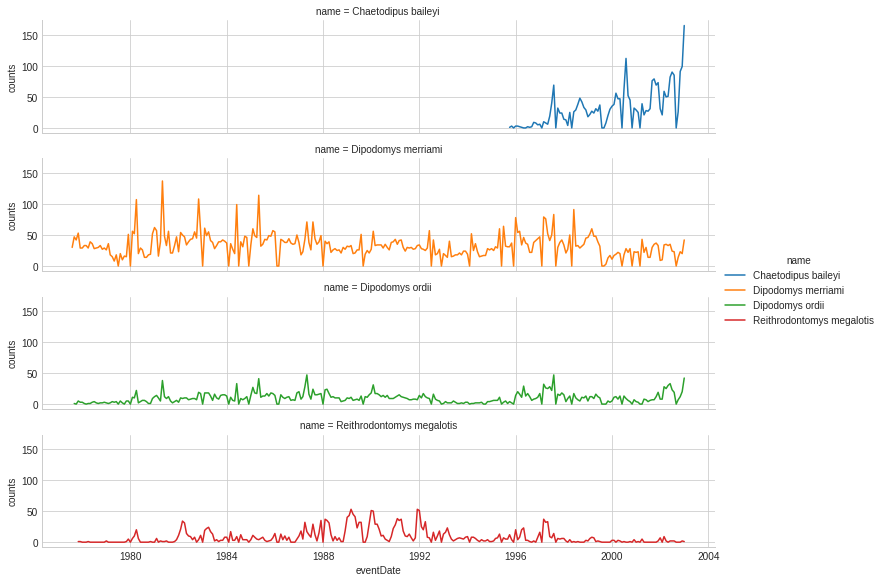

In [66]:
sns.relplot(data=month_evolution, x='eventDate', y="counts", 
            row="name", kind="line", hue="name", height=2, aspect=5)

<div class="alert alert-success">

**EXERCISE**

Plot the annual amount of occurrences for each of the 'taxa' as a function of time using Seaborn. Plot each taxa in a separate subplot and do not share the y-axis among the facets.

<details><summary>Hints</summary>

- Combine `resample` and `groupby`!
- Check out the previous exercise for the plot function.
- Pass the `sharey=False` to the `facet_kws` argument as a dictionary.
    
</details>

In [67]:
year_evolution = survey_data.groupby("taxa").resample('A', on='eventDate').size()
year_evolution.name = "counts"
year_evolution = year_evolution.reset_index()

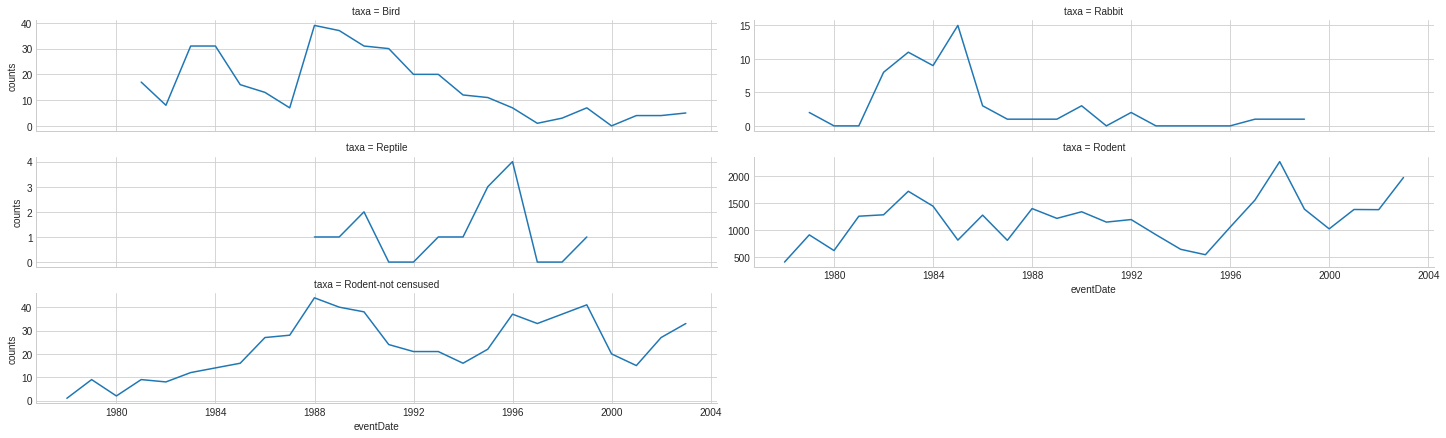

In [68]:
sns.relplot(data=year_evolution, x='eventDate', y="counts", 
            col="taxa", col_wrap=2, kind="line", height=2, aspect=5, 
            facet_kws={"sharey": False})

<div class="alert alert-success">

**EXERCISE**

The observations where taken by volunteers. You wonder on which day of the week the most observations where done. Calculate for each day of the week (`weekday`) the number of observations and make a bar plot.

<details><summary>Hints</summary>

- Did you know the Python standard Library has a module `calendar` which contains names of week days, month names,...?
    
</details>

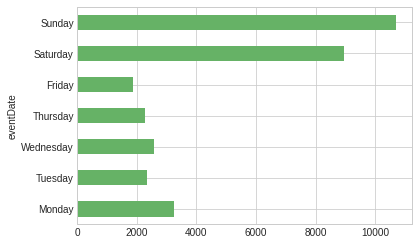

In [69]:
fig, ax = plt.subplots()
survey_data.groupby(survey_data["eventDate"].dt.weekday).size().plot(kind='barh', color='#66b266', ax=ax)
import calendar
xticks = ax.set_yticklabels(calendar.day_name)

Nice work!